<h1>Incidenti & inconvenienti aerei</h1>
<h4>Bosia Luca e Pansoni Corrado - a.a. 2020/21 - Corso di Data Science, progetto di semestre</h4> <br>
 <h2>Introduzione</h2>
<p> Il dataset preso in analisi si riferisce agli incidenti e inconvenienti aerei che si sono verificati dal 1962 negli Stati Uniti, nei propri territori e nelle acque internazionali. I dati contenuti sono adattati da quelli proveninenti dall'NTSB, un'agenzia investigativa indipendente del Governo degli Stati Uniti che indaga in merito agli incidenti che coinvolgono aeroplani, navi, treni, oleodotti e gasdotti. Questi dati, come si noterà in seguito, risultano parecchio incompleti dal 1962 al 1982. Si è quindi deciso di utilizzare le osservazioni dal 1982 fino a febbraio 2021, mese nel quale il dataset riporta gli ultimi dati. In fase di scrittura di questo report (fine dicembre 2021) non è stato pubblicato alcun aggiornamento del dataset. </p>
<h4>Riferimento dataset:</h4>
<p>link </p>
<h4>Presentazione del dataset:</h4>
<p>link </p>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go

aviation = pd.read_csv("AviationData.csv", encoding='ISO-8859-1')

<h2>Colonne dataset</h2>
<p>Il dataset contiene 31 colonne, di seguito visualizzate,e 84.200 osservazioni.
</p>


In [2]:
for col in aviation.columns:
    print(f"{col}")

Event.Id
Investigation.Type
Accident.Number
Event.Date
LOCATION
Country
Latitude
Longitude
Airport.Code
Airport.Name
Injury.Severity
Aircraft.damage
Aircraft.Category
Registration.Number
Make
Model
Amateur.Built
Number.of.Engines
Engine.Type
FAR.Description
Schedule
Purpose.of.flight
Air.carrier
Total.Fatal.Injuries
Total.Serious.Injuries
Total.Minor.Injuries
Total.Uninjured
Weather.Condition
Broad.phase.of.flight
Report.Status
Publication.Date


<h2>Tipologia di dati</h2>
<p>Si visualizzano le prime righe presenti nel dataset, per capire quali dati sono presenti e in che forma.</p>

In [3]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,Fatal,Substantial,Airplane,N13VT,Velocity,Vtwin,No,2.0,NaN,91,NaN,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,Fatal,Destroyed,Helicopter,N13AT,Bell,206,No,1.0,NaN,91,NaN,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,Minor,Substantial,Airplane,N56517,Maule,M-6-235,No,1.0,NaN,91,NaN,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,Non-Fatal,Substantial,Airplane,N3477E,Cessna,172N,No,1.0,NaN,91,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,Minor,Substantial,Airplane,N8183C,Piper,PA-18,No,1.0,NaN,91,NaN,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


<p>Si visualizzano i tipi dei dati presenti. </p>

In [4]:
aviation.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
LOCATION                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

<h2>Pulizia del dataset</h2>
<h3>Rimozione delle colonne</h3>
<p>Per snellire il dataset si sono rimosse le seguenti colonne:</p>
<ul>
<li>Event Id:</li>
    <dd>id univoco dell'evento</dd>
<li>Accident Number:</li>
    <dd>valore alfanumerico univoco per ogni incidente;</dd>
<li>Airport Code:</li>
    <dd>codice alfanumerico che individua l'aereoporto dove si è verificato l'incidente (se verificatosi nei pressi di un aereoporto);</dd>
<li>Airport Name:</li>
    <dd>nome dell'aereoporto individuato dal codice sopradescritto;</dd>
<li>Registration Number:</li>
    <dd>numero di registrazione del volo;</dd>
<li>Air Carrier:</li>
    <dd>compagnia aerea, se presente, titolare del volo incidentato;</dd>
<li>Schedule:</li>
    <dd>codice NSCH o SCHD, interno alle compagnie aeree;</dd>
<li>FAR Description:</li>
    <dd>Federal Aviation Regulations: articolo del codice avionistico federale;</dd>
<li>Report Status:</li>
    <dd>grado di certezza del report sull'incidente;</dd>
<li>Publication Date:</li>
    <dd>data di pubblicazione del report;</dd>
</ul>

In [5]:
#Drop delle colonne inutili
columns = ['Event.Id' ,'Accident.Number', 'Airport.Code', 'Airport.Name', 'Registration.Number','Air.carrier', 'Schedule', 'FAR.Description', 'Report.Status', 'Publication.Date']
aviation_slim = aviation.drop(columns, axis=1)


<h3>Aviation Slim</h3>
<p> Il dataset ottenuto dalla rimozione delle colonne e utilizzato da qui in seguito è denominato <strong> "aviation_slim"</strong> e contiene le seguenti colonne: </p>
 <ol type="1">
<li>Investigation Type:</li>
    <dd>tipo di investigazione: suddivione fra incidenti e accidenti;</dd>
<li>Event Date:</li>
    <dd>data dell'evento;</dd>
<li>Location:</li>
    <dd>luogo dell'incidente riportato nel formato CITY,STATE(2);</dd>
<li>Country:</li>
    <dd>Paese nel quale si è verificato l'incdente;</dd>
<li>Latitude:</li>
    <dd>latitudine dell'incidente;</dd>
<li>Longitude:</li>
    <dd>longitudine dell'incidente;</dd>
<li>Injury Severity:</li>
    <dd>gravità dell'incidente;</dd>
<li>Aircraft damage:</li>
    <dd>gravità dei danni all'aereomobile;</dd>
<li>Aircraft Category:</li>
    <dd>tipologia di velivolo;</dd>
<li>Make:</li>
    <dd>marca del velivolo;</dd>
<li>Model:</li>
    <dd>nome del modello dell'aereomobile;</dd>
<li>Amateur Built:</li>
    <dd>costruzione amatoriale (YES/NO);</dd>
<li>Number of Engines:</li>
    <dd>numero di motori presenti nel velivolo;</dd>
<li>Engine Type:</li>
    <dd>tipo di motore/i presenti nel velivolo;</dd>
<li>Scopo del volo:</li>
    <dd>motivo per il quale il velivolo è utilizzato;</dd>
<li>Total Fatal Injuries:</li>
    <dd>totale delle persone decedute;</dd>
<li>Total Serious Injuries:</li>
    <dd>totale dei feriti gravi;</dd>
<li>Total Minor Injuries:</li>
    <dd>totale dei feriti non gravi;</dd>
 <li>Total Uninjured:</li>
    <dd>totale degli illesi;</dd>
<li>Weather Condition:</li>
    <dd>condizioni metereologiche (VMC/IMC);</dd>
<li>Broad phase of flight:</li>
    <dd>fase di volo nella quale si è verificato l'incidente.</dd>
</ol>
<p>Qui di seguito sono mostrate le prime cinque osservationi di <strong>aviation_slim</strong>.

In [6]:
aviation_slim.head()

,Investigation.Type,Event.Date,LOCATION,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,Fatal,Substantial,Airplane,Velocity,Vtwin,No,2.0,NaN,Ferry,2.0,0.0,0.0,0.0,VMC,NaN
1,Accident,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,Fatal,Destroyed,Helicopter,Bell,206,No,1.0,NaN,Aobv,4.0,0.0,0.0,0.0,VMC,NaN
2,Accident,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,Minor,Substantial,Airplane,Maule,M-6-235,No,1.0,NaN,Personal,0.0,0.0,2.0,0.0,NaN,NaN
3,Accident,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,Non-Fatal,Substantial,Airplane,Cessna,172N,No,1.0,NaN,Instructional,0.0,0.0,0.0,1.0,VMC,NaN
4,Accident,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,Minor,Substantial,Airplane,Piper,PA-18,No,1.0,NaN,Personal,0.0,0.0,1.0,0.0,NaN,NaN


<h3>Pulizia dei dati</h3>
<p>I dati nel dataset contengono delle mancanze, per via di elementi non riportati oppure dei dati che non sono omogeneizzati con quanto contenuto nelle altre righe. Per questi motivi si è reso necessario eseguire una "pulizia" delle osservazioni. Questi aggiornamenti sono stati riportati nel dataset <strong>aviation_slim</strong>. <br>
Si sono fatte le seguenti modifiche per una migliore comprensione dei risultati:</p>
<ul>
<li>divisa la colonna "LOCATION" in due colonne:</li>
    <dd><strong>"City"</strong> e <strong>"State"</strong>;</dd>
<li>pulito il dato riguardante la gravità dell'incidente:</li>
    <dd>in una nuova colonna chiamata <strong>"InjurySeverityType"</strong>;</dd>
<li>divisa la colonna <strong>"Event.Date"</strong> in tre colonne:</li>
    <dd> <strong>"year"</strong>, <strong>"month"</strong> e <strong>"day"</strong>;</dd>
<li>modificata la colonna "Phase" scrivendo i dati in maiuscolo:</li>
    <dd>si ha cosí un'omogenizzazione dei dati;</dd>
<li>eliminate le colonne modificate come spiegato nei punti di cui sopra:</li>
    <dd>si evita cosí una duplicazione dei dati;</dd>
<li>trasformato le colonne di <strong>"Latitude"</strong> e <strong>"Longitude" </strong>in tipo numerico:</li>
    <dd>per una migliore manipolazione dei dati;</dd>
<li>Riempito tutti i dati mancanti con <strong>"UNKNOWN"</strong>:</li>
    <dd>per una migliore manipolazione dei dati;</dd>
<li>Pulito i dati di  <strong>"InjurySeverityType"</strong>;</li>
    <dd> vengono suddivisi fra "Fatal" o "Non-Fatal";</dd>
<li>Trasformati i dati rimanenti di tipo NaN:</li>
    <dd>trasformati a 0.</dd>
</ul>

In [7]:
accepted = ['LANDING','TAKEOFF','CRUISE','MANEUVERING','UNKNOWN','APPROACH']
def other_phases(phase):
    if phase not in accepted:
        return 'OTHER'
    else:
        return phase
    
aviation_slim['City'] = aviation_slim['LOCATION'].str.split(',').str[0]
aviation_slim['State'] = aviation_slim['LOCATION'].str.split(',').str[1]

aviation_slim['InjurySeverityType'] = aviation_slim['Injury.Severity'].str.split('(').str[0]

aviation_slim['year'] = [int(i.split('-')[0]) for i in aviation_slim['Event.Date']]
aviation_slim['month'] = [int(i.split('-')[1]) for i in aviation_slim['Event.Date']]
aviation_slim['day'] = [int(i.split('-')[2]) for i in aviation_slim['Event.Date']]

aviation_slim['Phase'] = aviation_slim['Broad.phase.of.flight'].str.upper()

aviation_slim = aviation_slim.drop(['LOCATION','Injury.Severity','Event.Date','Broad.phase.of.flight'],axis=1)

In [8]:
categorical_columns = aviation_slim.select_dtypes(include=['object']).columns

aviation_slim[["Latitude", "Longitude"]] = aviation_slim[["Latitude", "Longitude"]].apply(pd.to_numeric)
aviation_slim[categorical_columns] = aviation_slim[categorical_columns].fillna("UNKNOWN")

aviation_slim = aviation_slim.fillna("UNKNOWN")

aviation_slim.loc[aviation_slim['InjurySeverityType'] != 'Fatal', 'InjurySeverityType'] = 'Non-Fatal'
aviation_slim.loc[aviation_slim['Weather.Condition'] == 'UNKNOWN', 'Weather.Condition'] = 'UNK'

aviation_slim['Latitude'] = pd.to_numeric(aviation_slim['Latitude'], errors='coerce')
aviation_slim['Longitude'] = pd.to_numeric(aviation_slim['Longitude'], errors='coerce')
aviation_slim = aviation_slim.replace(np.nan, 0, regex=True)

<p>Qui di seguito sono mostrate le prime cinque osservationi di <strong>aviation_slim</strong> con i dati modificati quanto descritto sopra.

In [9]:
aviation_slim.head()

,Investigation.Type,Country,Latitude,Longitude,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,City,State,InjurySeverityType,year,month,day,Phase
0,Accident,United States,42.595377,-89.030245,Substantial,Airplane,Velocity,Vtwin,No,2.0,UNKNOWN,Ferry,2.0,0.0,0.0,0.0,VMC,JANESVILLE,WI,Fatal,2021,2,16,UNKNOWN
1,Accident,United States,18.354444,-65.027778,Destroyed,Helicopter,Bell,206,No,1.0,UNKNOWN,Aobv,4.0,0.0,0.0,0.0,VMC,St Thomas,CB,Fatal,2021,2,15,UNKNOWN
2,Accident,United States,61.336392,-152.016430,Substantial,Airplane,Maule,M-6-235,No,1.0,UNKNOWN,Personal,0.0,0.0,2.0,0.0,UNK,TYONEK,AK,Non-Fatal,2021,2,13,UNKNOWN
3,Accident,United States,43.297731,-89.755693,Substantial,Airplane,Cessna,172N,No,1.0,UNKNOWN,Instructional,0.0,0.0,0.0,1.0,VMC,PRAIRIE DU SAC,WI,Non-Fatal,2021,2,12,UNKNOWN
4,Accident,United States,27.243723,-81.413767,Substantial,Airplane,Piper,PA-18,No,1.0,UNKNOWN,Personal,0.0,0.0,1.0,0.0,UNK,LAKE PLACID,FL,Non-Fatal,2021,2,10,UNKNOWN


<p>Si visualizzano i tipi dei dati presenti dopo le modifiche. </p>

In [10]:
aviation_slim.dtypes

Investigation.Type         object
Country                    object
Latitude                  float64
Longitude                 float64
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines          object
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries       object
Total.Serious.Injuries     object
Total.Minor.Injuries       object
Total.Uninjured            object
Weather.Condition          object
City                       object
State                      object
InjurySeverityType         object
year                        int64
month                       int64
day                         int64
Phase                      object
dtype: object

<h2>Analisti dei dati</h2>
<h3>1. Andamento Incidenti dal 1982</h3>
<p>In questo grafico si analizza l'andamento degli incidenti dal 1982 fino a febbraio 2021.</p>
<h4>Osservazioni:</h4>
<p>Si osserva come è presente un evidente calo degli incidenti nel corso degli anni. Si passa da 3593 incidenti del 1982 a 1638 incidenti dell'anno 2019. Si considera maggiormente l'anno 2019 rispetto all'anno 2020 perchè esso non ha subito una diminuzione mondiale dei voli per causa della pandemia. L'anno 2021, nel quale si osserva una forte diminuzione degli incidenti (62),  non puó essere considetato in quanto non vi sono registrati gli incidenti di 10 mesi.</p>
<h4>Grafico:</h4>

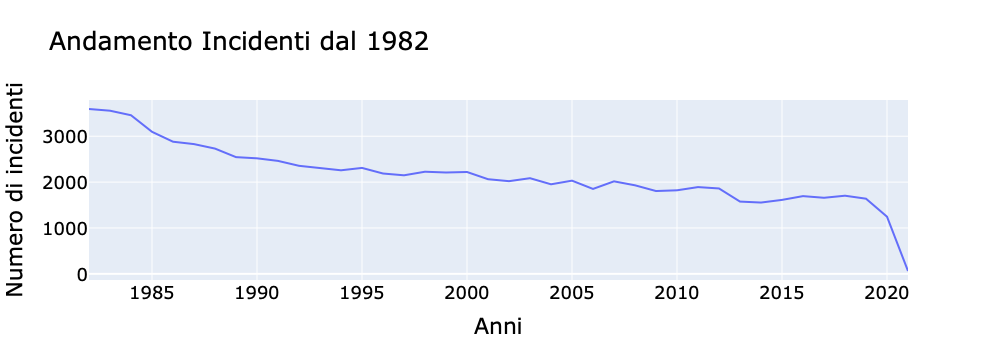

In [11]:
a = aviation_slim[(aviation_slim['Investigation.Type'] != 'UNKNOWN') & (aviation_slim['year'] > 1981)]
a = a.groupby('year').year.count().reset_index(name="count")
fig = px.line(a, x='year',y='count' ,title='Andamento Incidenti dal 1982')
fig.update_layout(
    title="Andamento Incidenti dal 1982",
    xaxis_title="Anni",
    yaxis_title="Numero di incidenti",
    font=dict(
        size=18,
        color="Black"
    )
)
fig.show()

<h3>2. Andamento Incidenti dal 1982, divisi per fatalià</h3>
<p>In questo grafico si analizza l'andamento degli incidenti dal 1982 fino a febbraio 2021, suddividendo gli incidenti fatali da quelli non fatali.</p>
<h4>Osservazioni:</h4>
<p>Si osserva come è presente un evidente calo degli incidenti non fatale nel corso degli anni. Si passa da 2938 incidenti del 1982 a 1258 incidenti dell'anno 2019.<br>
   Per quanto riguarda gli incidenti fatali si evince che la tendenza a diminuire è meno marcata ma presente. Si passa da 655 casi fatali del 1982 a 380 casi fatali nel 2019. </p>
<h4>Grafico:</h4>

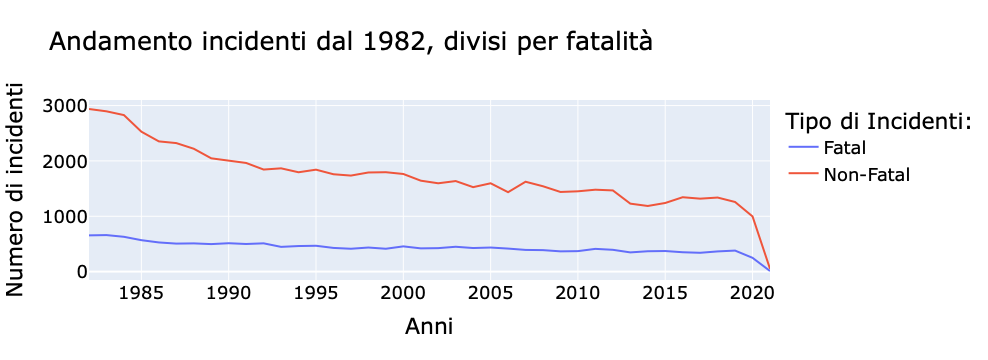

In [12]:
a = aviation_slim[(aviation_slim['Investigation.Type'] != 'UNKNOWN') & (aviation_slim['year'] > 1981)]
a = a.groupby(['year','InjurySeverityType']).year.count().reset_index(name="count")

fig = px.line(a, x='year' , y='count' ,color="InjurySeverityType",title='Andamento Incidenti dal 1982')
fig.update_layout(
    title="Andamento incidenti dal 1982, divisi per fatalità",
    xaxis_title="Anni",
    yaxis_title="Numero di incidenti",
    legend_title="Tipo di Incidenti:",
    font=dict(
        size=18,
        color="Black"
    )
)

fig.show()

<h3>3. Numero di incidenti per marca, rispetto ai numeri di produzione</h3>
<p>In questo grafico si analizza il numero di incidenti che si sono verificati per le principali marche di aereomobili presenti nel dataset, confrontandoli con i numeri di produzione.</p>
<h4>Osservazioni:</h4>
<p>La quantità di aerei prodotti da ogni marchio non è un dato presente nel dataset. I dati sono stati reperiti online e si riferiscono al numero di aerei prodotti nella storia del marchio in questione, dato che non è possibile sapere per ogni marchio quanti aerei ancora in funzione ci siano. Notiamo che il marchio Boeing, ha circa il 22% degli aerei prodotti che hanno subito almeno un incidente, mentre il marchio Bell ha soltanto il 7.52% degli aerei prodotti che hanno subito almeno un incidente negli anni presi in considerazione.
   Per quanto riguarda gli incidenti fatali si evince che la tendenza a diminuire è meno marcata ma presente. Si passa da 655 casi fatali del 1982 a 380 casi fatali nel 2019. </p>
 <h4>Grafico:</h4>

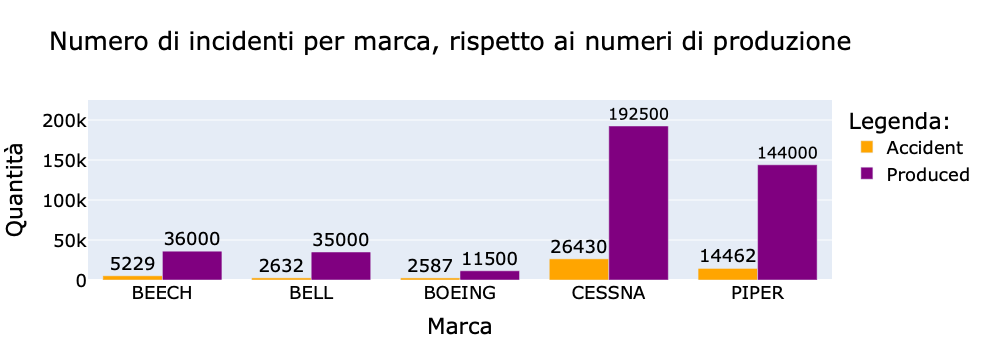

In [13]:
makes=aviation_slim['Make'].str.upper().value_counts().sort_values(ascending=False)[:5].reset_index(name="count")
makes = makes.sort_values(by="index")
fig = go.Figure(data=[
    go.Bar(name='Accident', x=makes['index'], y=makes['count'],marker_color='orange',text=makes['count']),
    go.Bar(name='Produced', x=makes['index'], y=[36000, 35000, 11500, 192500, 144000],marker_color='purple',text=[36000, 35000, 11500, 192500, 144000])
], layout_yaxis_range=[0,225000])
fig.update_traces( textposition='outside')
fig.update_layout(
    title="Numero di incidenti per marca, rispetto ai numeri di produzione",
    xaxis_title="Marca",
    yaxis_title="Quantità",
    legend_title="Legenda:",
    barmode='group',
    font=dict(
        size=18,
        color="Black"
    )

)
fig.show()

<h3>4. Numero di incidenti per marca, ogni 100 veicoli prodotti</h3>
<p>In questo grafico si analizza la percentuale di incidenti per marca, ogni 100 velivoli prodotti dalla suddetta. </p>
<h4>Osservazioni:</h4>
<p>Nella vita di un aereo se è un boeing ha il 21% di avere un incdiente nonb fatale<br>
    Si evince come, nel corso della sua "vita operativa", un aereo della marca Boeing possa avere il 21% di possibilità di avere un incidente non fatale. Questo non vuol dire che un Boeing abbia per forza piú problemi tecnici rispetto ad altri marchi, poichè è probabile che gli aerei Boeing (solitamente commerciali, non privati) vengano usati frequentemente e continuamente dalle compagnie aeree rispetto ad altri marchi di aerei solitamente usati privatamente. Risalta inoltre la percentuale di incidenti fatali del marchio Beech, questo perchè è produttore di elicotteri, che come rivela l'NTSB sono mediamente piú pericolosi rispetto agli aerei (https://www.torklaw.com/practice-areas/aviation-accidents/helicopters/).
    </p>
<h4>Grafico:</h4>

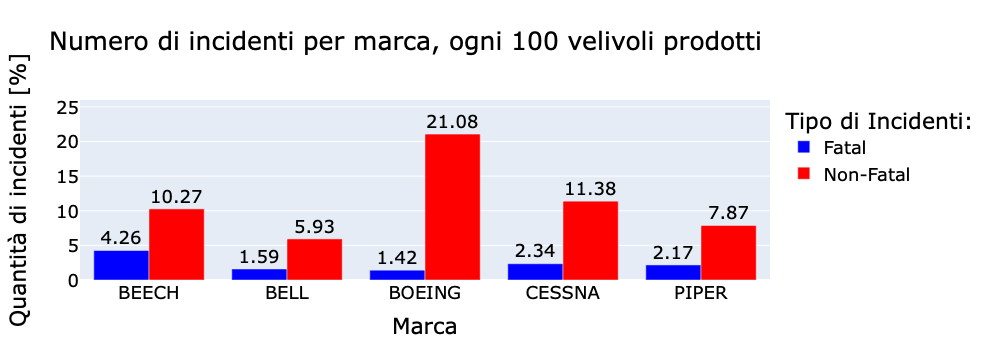

In [14]:
makes=['CESSNA','PIPER','BEECH','BELL','BOEING']
production=[36000, 35000, 11500, 192500, 144000]
total = aviation_slim['Make'].str.upper().value_counts().sort_values(ascending=False)[:5].reset_index(name="count")
total = total.sort_values(by="index")
a = aviation_slim[(aviation_slim['Investigation.Type'] != 'UNKNOWN')].copy()
a.loc[:,'Make'] = a.loc[:,'Make'].str.upper()
a = a[a.Make.isin(makes)]
a = a.groupby(['Make','InjurySeverityType']).InjurySeverityType.count().reset_index(name="count")
a = a.sort_values(by="Make")
fatal = a[(a['InjurySeverityType'] == 'Fatal')].copy()
nonfatal = a[(a['InjurySeverityType'] == 'Non-Fatal')].copy()

fig = go.Figure(data=[
    go.Bar(name='Fatal', x=fatal['Make'], y=(fatal['count']/production)*100, text = round((fatal['count']/production)*100,2),marker_color='blue'),
    go.Bar(name='Non-Fatal', x=nonfatal['Make'], y=(nonfatal['count']/production)*100, text = round((nonfatal['count']/production)*100,2),marker_color='red'),
], layout_yaxis_range=[0,26])
fig.update_traces( textposition='outside')
fig.update_layout(
    title="Numero di incidenti per marca, ogni 100 velivoli prodotti",
    xaxis_title="Marca",
    yaxis_title="Quantità di incidenti [%]",
    legend_title="Tipo di Incidenti:",
    barmode='group',
    font=dict(
        size=18,
        color="Black"
    )

)
fig.show()

<h3>5. Percentuale di incidenti, in base alla fase di volo</h3>
<p>In questo grafico si analizzano le fasi di volo, osservando in quali momenti del volo si verificano piú incidenti.</p>
<h4>Osservazioni:</h4>
<p>Si osserva che le maggiori percentuali di incidenti si verificano in fase di <strong>landing</strong> (atterraggio) e <strong>takeoff</strong> (decollo): infatti queste fasi contengono rispettivamente 24.26% e 19.11% degli incidenti. Il 43% degli incidenti avvengono quindi in queste due fasi del volo, mentre gli altri sono suddivisi nelle 10 fasi riportate nel grafico sottostante.</p>
<h4>Grafico:</h4>

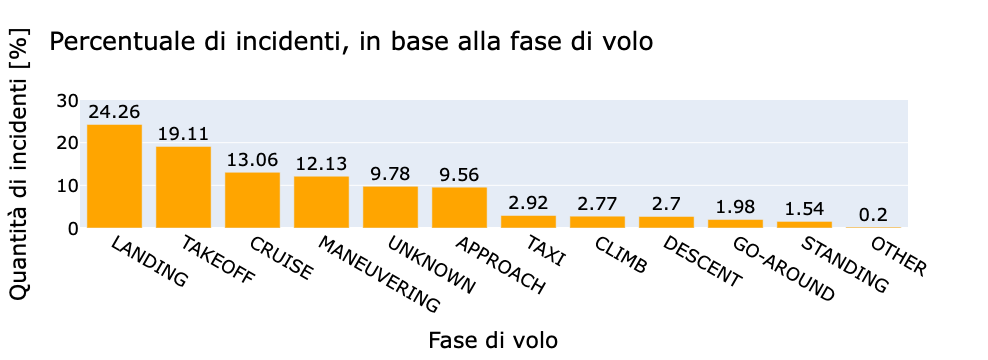

In [15]:
phases=aviation_slim['Phase'].str.upper().value_counts().sort_values(ascending=False).reset_index(name="count")
accidents = len(aviation_slim.index)

fig = go.Figure(data=[
    go.Bar(name='Phase of flight', x=phases['index'], y=(phases['count']/accidents)*100, text=round((phases['count']/accidents)*100,2),marker_color='orange')
], layout_yaxis_range=[0,30])
fig.update_traces( textposition='outside')
fig.update_layout(
    title="Percentuale di incidenti, in base alla fase di volo",
    xaxis_title="Fase di volo",
    yaxis_title="Quantità di incidenti [%]",
    font=dict(
        size=18,
        color="Black"
    )

)
fig.show()

<h3>6. Percentuale di incidenti durante l'atterraggio, in base alla visibilità</h3>
<p>In questo grafico si analizza la visibilità presente negli incidenti verificatisi in fase di <strong>landing</strong>.</p>
<h4>Osservazioni:</h4>
<p>Nel settore avionico la visibilità in fase di volo puó essere di due tipi:</p>
<ul>
    <li><strong>VMC:</strong> visual meteorological conditions, cioè quando il volo si svolge con ottima o buona visibilitá, avvalendosi della vista del pilota/i;
    <li><strong>IMC:</strong> instrumenta meteorological conditions, cioè quando il volo si svolge affidandosi soltanto alla guida degli strumenti di navigazioni, a causa di condizioni meteo avverse.
</ul>
<p>In <strong>UNK</strong> sono stati riportati i dati della quale non era disponibile una voce di visibilità.</p>

<p>Si nota come la maggior parte degli incidenti si verifica in condizione VMC, quindi con visibilità buona data da condizioni meteo ottimali. Per poter comprendere questo dato, è utile sapere che negli Stati Uniti soltanto 4 Stati hanno in media meno del 50% di giornate soleggiate.(https://www.currentresults.com/Weather/US/average-annual-state-sunshine.php).  </p>
<h4>Grafico:</h4>

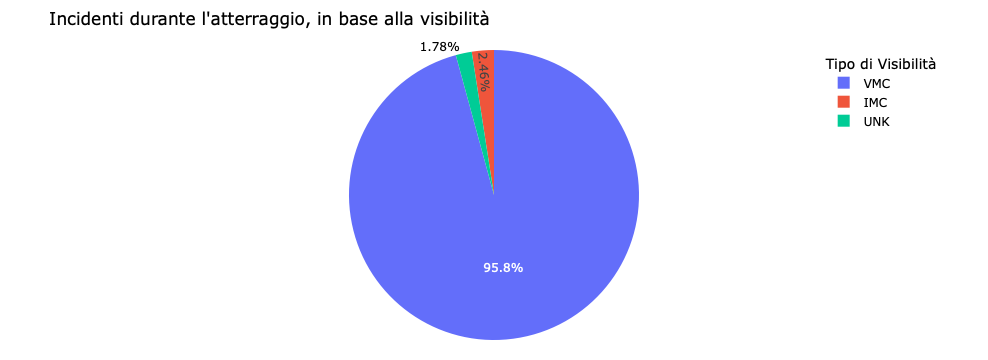

In [16]:
conditions = aviation_slim[(aviation_slim['Phase'] == 'LANDING')].copy()
conditions = conditions.groupby(['Phase','Weather.Condition']).Phase.count().reset_index(name="count")


fig = go.Figure(data=[go.Pie(labels=conditions['Weather.Condition'], values=conditions['count'])])
fig.update_layout(margin=dict(t=50, b=20, l=20, r=20))
fig.update_layout(
    title="Incidenti durante l'atterraggio, in base alla visibilità",
    legend_title="Tipo di Visibilità",
    font=dict(
        size=12,
        color="Black"
    )

)
fig.show()

<h3>7. Regressione degli incidenti per l'anno 2021</h3>
<p>In questo grafico si fornisce una regressione lineare per stimare la quantità di incidenti che si verificheranno entro la fine dell'anno 2021.<p>
<h4>Osservazioni:</h4>
<p>A causa della pandemia da COVID-19 i dati nell'anno 2020 possono portare a una sottostima degli incidenti che si verificheranno entro la fine del 2021. Questo perchè il traffico aereo negli Stati Uniti è sensibilmente calato (https://www.statista.com/statistics/1104036/novel-coronavirus-weekly-flights-change-airlines-region/) e di conseguenza anche gli incidenti sono diminuiti. Possiamo vedere che nel 2021 sono presenti degli incidenti, si riferiscono a quelli registrati fino a febbraio 2021. Si stima che, per la fine dell'anno 2021, si saranno verificati 1180 incidenti, 66 in meno rispetto all'anno 2020.</p>

<h4>Grafico:</h4>

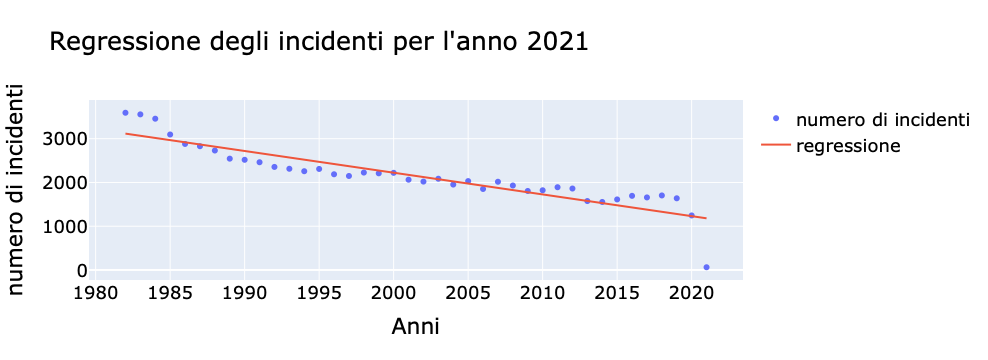

In [17]:
a = aviation_slim[(aviation_slim['Investigation.Type'] != 'UNKNOWN') & (aviation_slim['year'] > 1981)]
a = a.groupby('year').year.count().reset_index(name="count")
x = a["year"].values # Variabile esplicativa
y = a["count"].values # Variabile target

w_hat = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
b_hat = np.mean(y)-w_hat*np.mean(x)

x_line = np.array([np.min(x), np.max(x)])
y_line = b_hat + w_hat*x_line


data = [
    go.Scatter(x=x, y=y, mode="markers", name="numero di incidenti"),
    go.Scatter(x=x_line, y=y_line, mode="lines", name="regressione"),
]
layout = go.Layout(xaxis = dict(title="Anni"), yaxis = dict(title="Numero di incidenti"))
layout= go.Layout(
    title="Regressione degli incidenti per l'anno 2021",
    legend_title="",
     xaxis_title="Anni",
    yaxis_title="numero di incidenti",
    
    font=dict(
        size=18,
        color="Black"
    )

)
py.iplot(go.Figure(data, layout))



<h3>8. Incidenti con un aereo costruito amatorialmente</h3>
<p>In questo grafico si analizza la tipologia dell'incidente per gli aerei costruiti amatorialmente.</p>
<h4>Osservazioni:</h4>
<p>Si osserva come, in caso di aeri costruiti amatorialmente, il 27.9% degli incidenti ha un esito fatale. Questo dato può essere confrontato con quanto riportato nel grafico successivo.</p>
<h4>Grafico:</h4>

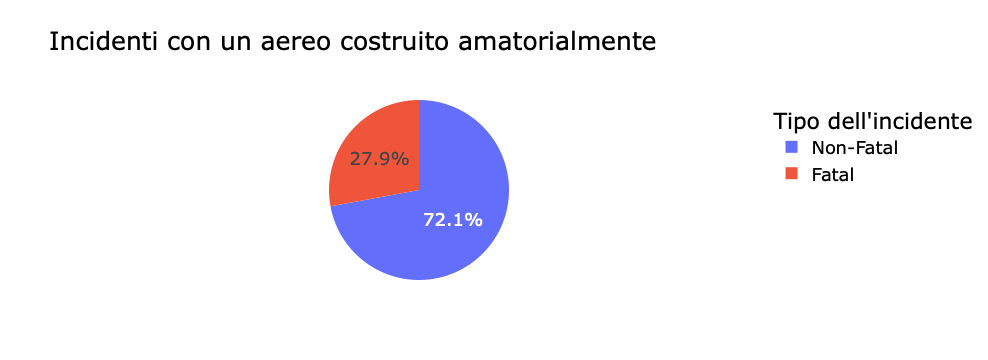

In [18]:
conditions = aviation_slim[(aviation_slim['Amateur.Built'] == 'Yes')].copy()
conditions = conditions.groupby(['Amateur.Built','InjurySeverityType']).Phase.count().reset_index(name="count")


fig = go.Figure(data=[go.Pie(labels=conditions['InjurySeverityType'], values=conditions['count'])])
fig.update_layout(
    title="Incidenti con un aereo costruito amatorialmente",
    legend_title="Tipo dell'incidente",
    font=dict(
        size=18,
        color="Black"
    )

)
fig.show()

<h3>9. Incidenti con un aereo costruito professionalmente</h3>
<p>In questo grafico si analizza la tipologia dell'incidente per gli aerei costruiti professionalmente.</p>
<h4>Osservazioni:</h4>
<p>Si osserva come, in caso di aeri costruiti professionalmente, il 19.2% degli incidenti ha un esito fatale. Stando a quanto riportato nel grafico precedente, si osserva come un aereo professionale abbia l'8.7% in meno di probabilità di avere un incidente con esito fatale, ed è quindi piú sicuro.</p>
<h4>Grafico:</h4>

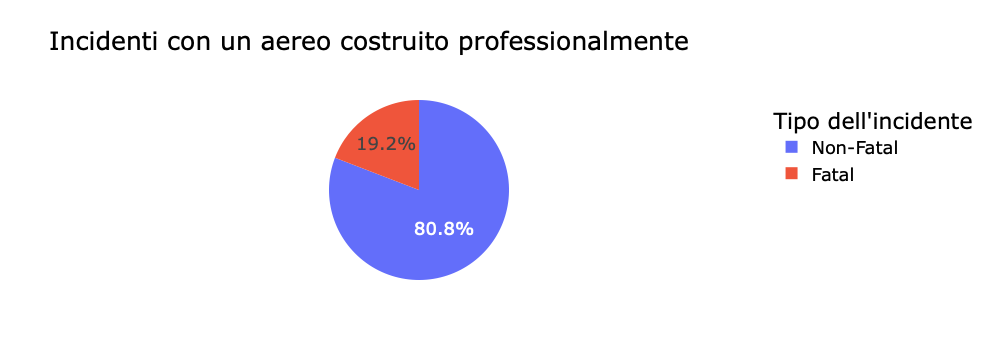

In [19]:
conditions = aviation_slim[(aviation_slim['Amateur.Built'] == 'No')].copy()
conditions = conditions.groupby(['Amateur.Built','InjurySeverityType']).Phase.count().reset_index(name="count")


fig = go.Figure(data=[go.Pie(labels=conditions['InjurySeverityType'], values=conditions['count'])])
fig.update_layout(
    title="Incidenti con un aereo costruito professionalmente",
    legend_title="Tipo dell'incidente",
    font=dict(
        size=18,
        color="Black"
    )

)
fig.show()

<h3>10. Distribuzione degli incidenti nel mondo</h3>
<p>.....</p>
<h4>Osservazioni:</h4>
<p>....... </p>
<h4>Grafico:</h4>

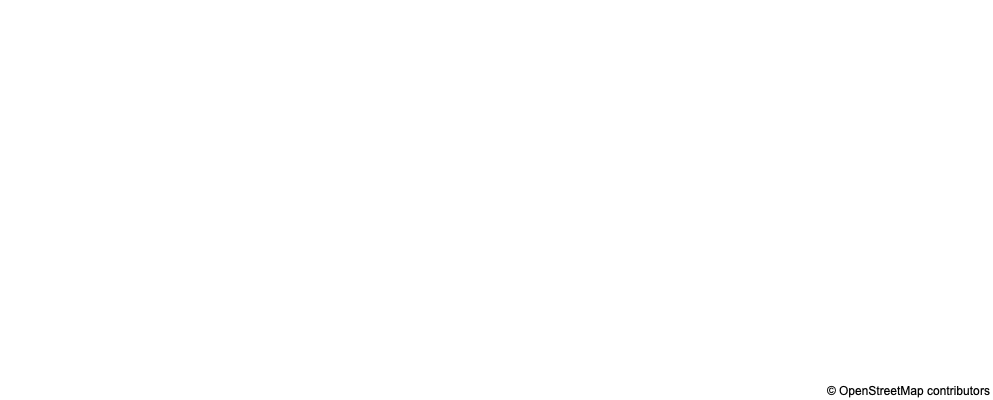

In [23]:
fatal = aviation_slim[(aviation_slim['InjurySeverityType'] == 'Fatal')].copy()
fatal_usa = fatal[(fatal['Country'] == 'United States')].copy()
fig = px.scatter_mapbox(fatal_usa, lat="Latitude", lon="Longitude", hover_data=["InjurySeverityType"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<h2>Conclusioni</h2>
<p>Grazie a questo progetto abbiamo potuto analizzare un dataset reale, partendo dai dati raggruppati in forma "grezza". Tramite ogni grafico abbiamo dato un messaggio, supportato dai dati, per poter capire meglio gli incidenti che si verificano con i mezzi aerei. Si è notata una diminuzione generale degli incidenti, anche se sopratutto quelli con esito non fatale, si è riscontrato un alto tasso di incidenti in fase di decollo e atterraggio, si è visto che anche con condizioni di visibilità ottimali si verifichino buona parte degli incidenti e come la costruzione professionale, rispetto a quella amatoriale, di un aereomobile permetta di avere una percentuale minore di incidenti fatali.